Lets now look into classification.

Some of the examples are from [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). 

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

More on the Dataset: https://ai.stanford.edu/~amaas/data/sentiment/

In [54]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

In [ ]:
train_labels[1]

In [ ]:
max([max(sequence) for sequence in train_data])

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])

decoded_review

### Preparing the data

What is the problem with this data as it is? We have list of integers. Each element as long as a given review.  
IMDB Dataset: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset?msclkid=67c2fdb7c66911ec9c14c87c755eca0a

Deep Learning Data Preparation Checklist
Before training your model, make sure:

**1. Data is clean**

- No missing values (or handled properly)  
- No obvious data entry errors  
- Correct data types  

**2. No data leakage**

- Train / validation / test split done first  
- Scaling parameters computed on training set only  
- No information from test set used during training  

**3. Numerical features are scaled**

Standardization (recommended):

$$
x' = \frac{x - \mu}{\sigma}
$$

Or Min–Max scaling:

$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

**4. Categorical features encoded**

- One-hot encoding (small categories)  
- Embeddings (large categories)  

**5. Targets prepared correctly**

- Regression → numeric  
- Binary classification → 0/1  
- Multi-class → integer labels or one-hot (depending on loss)  

**6. Input shapes verified**

- Correct tensor shape  
- No unexpected dimensions  
- Batch dimension handled properly  

**7. Sanity check before training**

- Print sample batch  
- Check value ranges  
- Run one forward pass  
- Confirm loss decreases on small subset  


If something behaves strangely during training,
first check the data.

**Encoding the integer sequences via multi-hot encoding**

In [18]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

What are we loosing here?  
What have we lost with that encoding?

In deep learning projects, performance problems are often caused by data issues rather than model architecture (like most ML problems, but here intensified).  
Before modifying your network, you should critically examine your dataset.

**1. Begin with systematic data exploration**

Before training any model:

- Inspect distributions of numerical variables  
- Check for class imbalance  
- Identify missing values  
- Detect outliers  

A model cannot compensate for poorly understood data.

**2. Handle missing values explicitly**

Neural networks cannot process NaN values.

Common approaches:

- Remove samples with excessive missing data  
- Impute numerical values (mean or median)  
- Replace categorical missing values with a separate category  

**3. Address class imbalance**

If one class dominates:

- Accuracy becomes unreliable  
- The model may ignore minority classes  

Possible solutions:

- Use class weights  
- Apply resampling techniques  
- Evaluate with F1-score or ROC-AUC instead of accuracy alone  

**4. Normalize input features properly**

Neural networks are sensitive to feature scale.

- Apply standardization or scaling  
- Compute scaling parameters on the training set only  
- Apply the same transformation to validation and test sets  

**5. Prevent data leakage**

Data leakage occurs when information from validation or test sets influences training.

Common sources:

- Scaling using full dataset statistics  
- Including future information in features  
- Improper data splitting  

Leakage leads to unrealistic performance estimates.

**6. Interpret training behavior carefully**

If training loss does not decrease:

- Verify input scaling  
- Check label format  
- Inspect learning rate  

If validation performance is significantly worse than training:

- Consider overfitting  
- Re-examine preprocessing  

**7. Use controlled debugging strategies**

To isolate problems:

- Train on a small subset of data  
- Attempt to intentionally overfit a small sample  
- Simplify the architecture  

If the model cannot fit a small dataset, preprocessing errors are likely.

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.], shape=(10000,))

In [20]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

y_train[0]

np.float32(1.0)

### Building your model

**Model definition**

**Thoughts and tips**  
This data is made of binary inputs and one number, scalar outputs. This is a rare and friendly set up.  
For this we use dense layers with relu activations. Sigmoid gets the score back to [0,1] for probability.  
What about loss? Crossentropy is best for probability problems.  
Rmsprop optimizer is a good start for every problem.

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Try mean_squared_error!  
Change the architecture of the network.  
Do you have any questions regarding this... guessing match?

### Validating your approach

**Setting aside a validation set**

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7822 - loss: 0.5418 - val_accuracy: 0.8590 - val_loss: 0.4170
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8865 - loss: 0.3446 - val_accuracy: 0.8752 - val_loss: 0.3313
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9155 - loss: 0.2568 - val_accuracy: 0.8801 - val_loss: 0.3013
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9280 - loss: 0.2095 - val_accuracy: 0.8586 - val_loss: 0.3394
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9424 - loss: 0.1741 - val_accuracy: 0.8853 - val_loss: 0.2794
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9514 - loss: 0.1512 - val_accuracy: 0.8844 - val_loss: 0.2921
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9579 - loss: 0.1320 - val_accuracy: 0.8824 - val_loss: 0.2921
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9664 - loss: 0.1120 - val_accuracy: 0.8841 - v

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

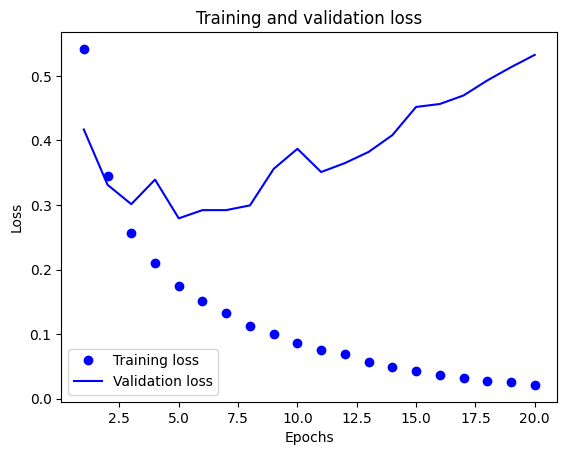

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

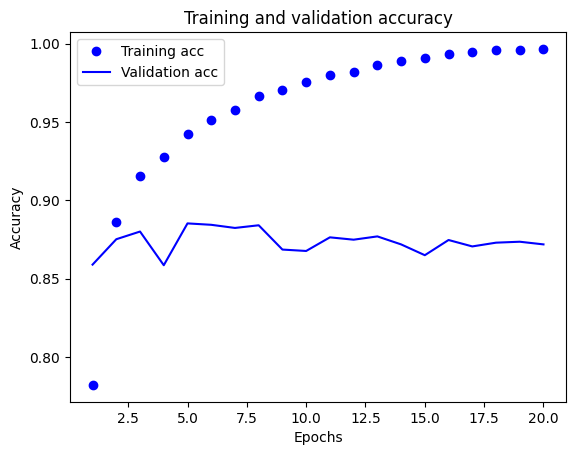

In [27]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7781 - loss: 0.5461
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8932 - loss: 0.3296
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9132 - loss: 0.2448
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9265 - loss: 0.2029
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8868 - loss: 0.2856


In [29]:
results

[0.2855677008628845, 0.8867999911308289]

### Using a trained model to generate predictions on new data

In [30]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.28137848],
       [0.997963  ],
       [0.8911924 ],
       ...,
       [0.10484674],
       [0.11208513],
       [0.6126588 ]], shape=(25000, 1), dtype=float32)

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

More on the Dataset, cool explained example: https://martin-thoma.com/nlp-reuters/

In [31]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [32]:
len(train_data)

8982

In [33]:
len(test_data)

2246

In [34]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [35]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

decoded_newswire

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 2us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [36]:
train_labels[10]

np.int64(3)

### Preparing the data

**Encoding the input data**

In [37]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

So any idea what to do with the labels?

In [38]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [39]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Building your model

**Model definition**

Now we have way more classes to work with, and way more info that needs to diffrenciate between the data points.  
We need more neurons.  

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [41]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4528 - loss: 2.7023 - val_accuracy: 0.6280 - val_loss: 1.8049
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6875 - loss: 1.5218 - val_accuracy: 0.6960 - val_loss: 1.3603
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7446 - loss: 1.1587 - val_accuracy: 0.7280 - val_loss: 1.1809
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7912 - loss: 0.9479 - val_accuracy: 0.7780 - val_loss: 1.0656
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8329 - loss: 0.7810 - val_accuracy: 0.7860 - val_loss: 0.9883
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8608 - loss: 0.6510 - val_accuracy: 0.8030 - val_loss: 0.9271
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8869 - loss: 0.5389 - val_accuracy: 0.8080 - val_loss: 0.8927
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9030 - loss: 0.4543 - val_accuracy: 0.8120 - v

**Plotting the training and validation loss**

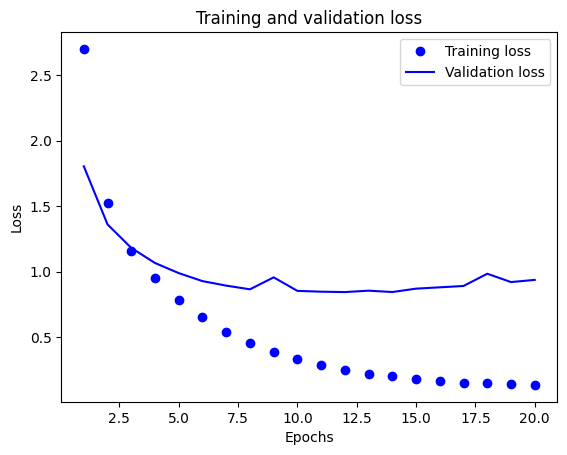

In [44]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

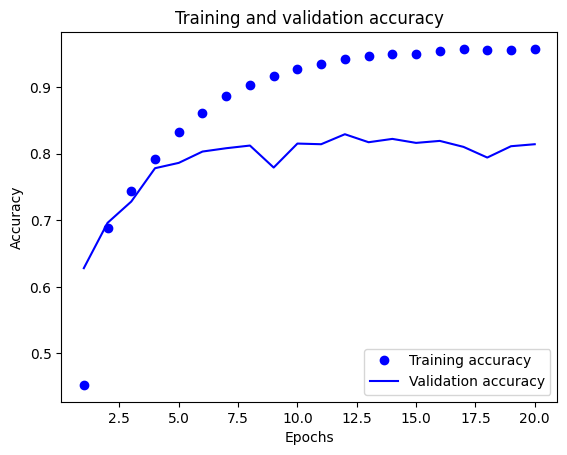

In [45]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [46]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5082 - loss: 2.6480
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6781 - loss: 1.5033
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7561 - loss: 1.1408
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8090 - loss: 0.9096
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8419 - loss: 0.7448
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8713 - loss: 0.6143
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8958 - loss: 0.5081
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9108 - loss: 0.4278
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9226 - loss: 0.3616
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: 0.9144


In [47]:
results

[0.9143921732902527, 0.7938557267189026]

In [48]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.1705253784505788)

### Generating predictions on new data

In [49]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [50]:
predictions[0].shape

(46,)

In [51]:
np.sum(predictions[0])

np.float32(1.0000001)

In [52]:
np.argmax(predictions[0])

np.int64(3)

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [53]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3652 - loss: 2.9608 - val_accuracy: 0.3940 - val_loss: 2.4163
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4169 - loss: 2.1535 - val_accuracy: 0.4160 - val_loss: 2.0013
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5685 - loss: 1.6270 - val_accuracy: 0.6510 - val_loss: 1.4977
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6809 - loss: 1.2877 - val_accuracy: 0.6570 - val_loss: 1.3829
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7017 - loss: 1.1408 - val_accuracy: 0.6590 - val_loss: 1.3355
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7273 - loss: 1.0330 - val_accuracy: 0.6840 - val_loss: 1.3001
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7674 - loss: 0.9380 - val_accuracy: 0.7030 - val_loss: 1.3050
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7930 - loss: 0.8589 - val_accuracy: 0.7090 - val_los

Plot later the validation and training loss and accuracy.  
What happens with results and predictions with that small middle layer?